## 합성곱신경망 이미지 이진분류 연습문제
- cat-dog 이미지 사용해서 
- 개와 고양이를 분류하는 딥러닝 모델 생성 

In [1]:
# cat-or-dog 폴더 내 train/test 이미지 사용해서 개와 고양이 분류하는 딥러닝 모델 생성
# 모델 완성 후 아래 코드 실행시켜서 분류 예측 확인
# 15번 노트 참고해서 모델링 진행
# rescale만 진행한 모델 1
# 이미지 증강 포함시켜서 진행한 모델 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
training_dir = 'data/cat-or-dog/training/'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# rescale만 진행한 모델1에 사용할 제너레이터 객체
train_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
# 학습이미지를 모델에 자동 주입
# 타겟값 구성 - 타겟값도 모델에 자동 주입
# 이미지 사이즈도 변경

train_generator = train_datagen.flow_from_directory(
                                training_dir,
                                target_size=(100, 100),
                                class_mode="binary",
                            )

Found 557 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
# conv2D, maxpoling2D : 기능 진행 시 대상 데이터가 2차원형태일때 사용하는 클래스
# conv1D, GlobalMaxPooling : 1차원 data일때 사용하는 클래스

In [8]:
model = Sequential()
# input 수 : 3(100*100) >> output : 16(98*98)가 나오게 될 수 있다 (pdf 14에서 그림 보면)
model.add(Conv2D(16, (3, 3), input_shape=(100, 100, 3), activation="relu"))
# 안넣어도 되지만 pooling층을 하나 넣어보겠다
model.add(MaxPooling2D(2,2)) # 2D를 출력하는 층의 값을 받아서 
model.add(Flatten()) # 2D를 1D로 변환해주는 층이 있어야함 
model.add(Dense(512, activation="relu")) # Dense는 1D밖에 처리 못하니까
model.add(Dense(1, activation="sigmoid"))

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 38416)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      19,669,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,670,465 (75.04 MB)

 Trainable params: 19,670,465 (75.04 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import RMSprop
# 컬러이미지인데 이미지수가 적음 >> 학습률을 적게(더 잘게 쪼개서 본다는 얘기임) 구성해서 이미지 특성을 세밀하게 찾도록 구성
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

In [11]:
# 검증데이터 전처리
validation_dir = 'data/cat-or-dog/validation/'
val_datagen = ImageDataGenerator(rescale=1/255)

val_generator = val_datagen.flow_from_directory(    
    validation_dir,
    target_size = (100, 100), # 또는 (300, 300)
    class_mode = 'binary'
)

Found 140 images belonging to 2 classes.


In [12]:
model.fit(train_generator, 
          epochs=15, 
          validation_data=val_generator)

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.5037 - loss: 13.8064 - val_accuracy: 0.5000 - val_loss: 1.0884
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.5180 - loss: 1.7373 - val_accuracy: 0.5143 - val_loss: 0.9144
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.5456 - loss: 0.9757 - val_accuracy: 0.5571 - val_loss: 0.7056
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 0.6200 - loss: 0.6280 - val_accuracy: 0.5500 - val_loss: 0.7515
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.7368 - loss: 0.5648 - val_accuracy: 0.5714 - val_loss: 0.7048
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.7883 - loss: 0.5039 - val_accuracy: 0.6214 - val_loss: 0.7642
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 342ms/step - accuracy: 0.8408 - loss: 0.4479 - val_accuracy: 0.6571 - val_loss: 0.6934
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - accuracy: 0.9015 - loss: 0.3597 - val_accuracy: 0

In [13]:
loss, accuracy = model.evaluate(val_generator)
print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5544 - loss: 1.2834
정확도: 0.5500, 손실: 1.2294


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import tensorflow as tf

In [15]:
import sys
sample_images = ['./data/image/sample_img_{}.jpg'.format(i) for i in range(1, 5)]

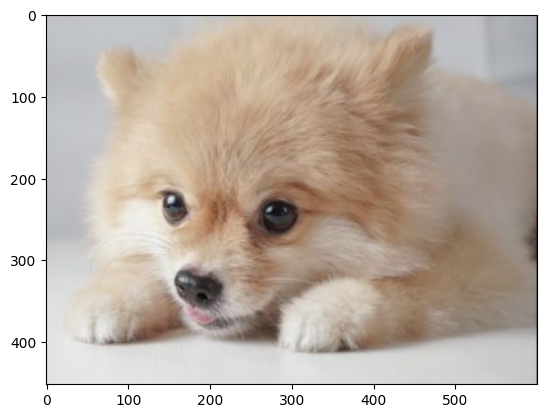

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
classes :  [[3.2334948e-33]]
클래스(레이블) 출력 :  3.2334948e-33
./data/image/sample_img_1.jpg는 고양이입니다.


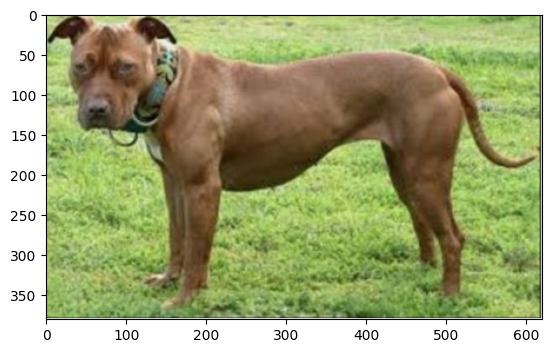

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
classes :  [[0.]]
클래스(레이블) 출력 :  0.0
./data/image/sample_img_2.jpg는 고양이입니다.


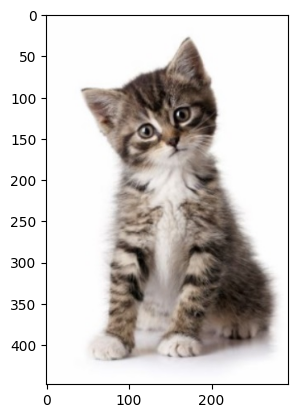

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
classes :  [[0.]]
클래스(레이블) 출력 :  0.0
./data/image/sample_img_3.jpg는 고양이입니다.


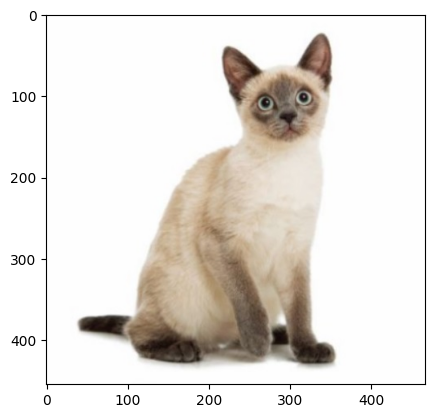

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
classes :  [[0.]]
클래스(레이블) 출력 :  0.0
./data/image/sample_img_4.jpg는 고양이입니다.


In [16]:
for n in sample_images:
    plt.imshow(mpimg.imread(n))
    plt.show()

    img = tf.keras.utils.load_img(n, target_size=(100, 100))
    x = tf.keras.utils.img_to_array(img) 
    x = np.expand_dims(x, axis=0) # (1, 100, 100, 3)
 

    classes = model.predict(x)
    print('classes : ', classes)

    print('클래스(레이블) 출력 : ', classes[0][0])

    if classes[0][0] > 0.5:
        print(n + '는 개입니다.')
    else:
        print(n + '는 고양이입니다.')

### 이미지 증강시켜 학습하기

In [17]:
train_datagen = ImageDataGenerator(
    rescale= 1/255,
    rotation_range=20, # 회전 시켜서 >> 20도까지 해봐라
    width_shift_range=0.2, # 위아래로 이동시켜서 >> 20%까지 해봐라
    height_shift_range=0.2, # 위아래로 이동시켜서 >> 20%까지 해봐라
    shear_range=0.2, #
    zoom_range=0.2, # 축소, 확대해서 >> 20%까지 해봐라
    horizontal_flip=True, # 좌우반전도 해라
    fill_mode = "nearest" # 이미지 변환했을때 생기는 공백을 채울때 방법 설정
)

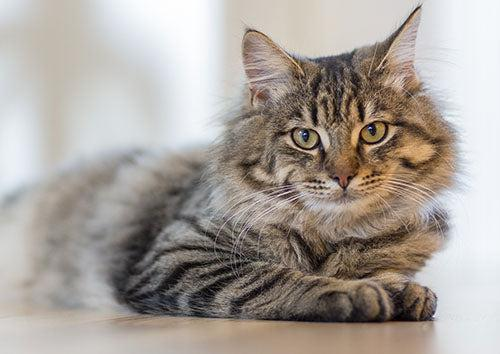

In [18]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array
img = load_img(training_dir + '/cats/cat_4.jpg')
x = img_to_array(img)
x=tf.keras.utils.img_to_array(img)
x= np.expand_dims(x, axis=0) # (1, 100, 100, 3) >> 차원 늘리는 방법 1
    
# x = x.reshape((1, ) + x.shape) >> 차원 늘리는 방법 2
img

In [19]:
# 증식 제너레이터
aug = train_datagen.flow(
        x, batch_size= 1,
        save_to_dir = "./data/image2",
        save_prefix="cat",
        save_format="jpg"
)
i = 0
for batch in aug:
    i += 1
    if i > 50 :
        break
        # image2폴더 보면 다양하게 변형되어서 들어가있음

In [20]:
# 증강 제너레이터
train_generator = train_datagen.flow_from_directory(
                            training_dir,
                            target_size=(100,100),
                            class_mode='binary'
                )

Found 557 images belonging to 2 classes.


In [21]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation="relu"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(128, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten()) 
model2.add(Dense(512, activation="relu")) 
model2.add(Dropout(0.25))
model2.add(Dense(1, activation="sigmoid"))

In [22]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,873 (25.36 MB)

 Trainable params: 6,647,873 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model2.compile(loss="binary_crossentropy",
               optimizer=RMSprop(learning_rate=0.001),
               metrics=["accuracy"])

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

check_pointer = ModelCheckpoint(
    "./model/best_model_catordog.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True
)

early_stopping= EarlyStopping(monitor="val_loss", patience=5)

# 학습데이터만 증강
history = model2.fit(
    train_generator,
    epochs=50,
    batch_size=64,
    validation_data= val_generator,
    callbacks= [check_pointer, early_stopping]
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.5203 - loss: 2.6810
Epoch 1: val_loss improved from inf to 0.69639, saving model to ./model/best_model_catordog.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 420ms/step - accuracy: 0.5200 - loss: 2.6145 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.4609 - loss: 0.6989
Epoch 2: val_loss improved from 0.69639 to 0.69405, saving model to ./model/best_model_catordog.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.4625 - loss: 0.6988 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.4425 - loss: 0.6995
Epoch 3: val_loss did not improve from 0.69405
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.4428 - loss: 0.6993 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.5406 - loss: 0.7082
Epoch 4: val_loss did not improve from 0.69405
18/18 ━━━━━

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

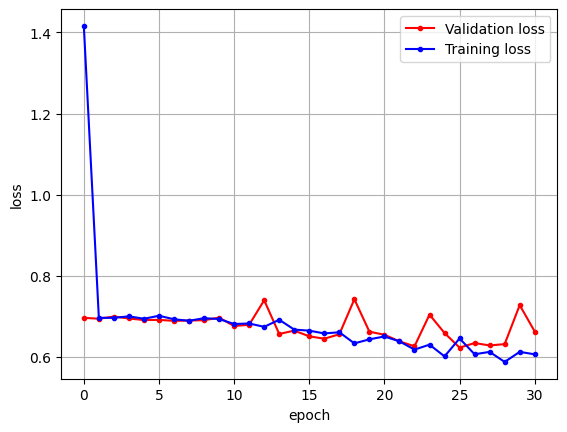

In [25]:
import numpy as np

# 시각화 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Loss
x_len = np.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c='red', label='Validation loss')
plt.plot(x_len, loss, marker='.', c='blue', label='Training loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'accuracy')

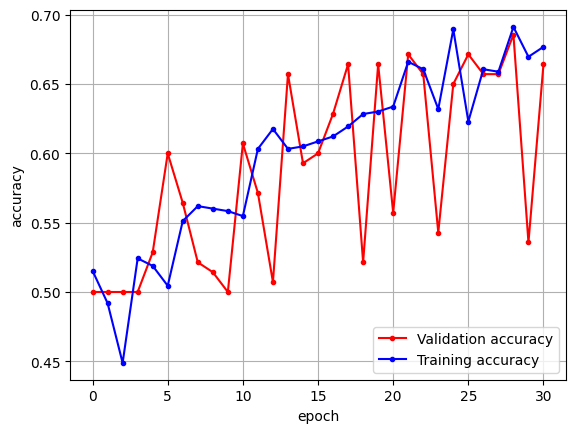

In [26]:
x_len = np.arange(len(loss))
plt.plot(x_len, val_acc, marker='.', c='red', label='Validation accuracy')
plt.plot(x_len, acc, marker='.', c='blue', label='Training accuracy')

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
from tensorflow.keras.models import load_model

best_model = load_model("./model/best_model_catordog.keras")

In [28]:
model2.evaluate(val_generator)
best_model.evaluate(val_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6746 - loss: 0.6445


[0.6625849008560181, 0.6642857193946838]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.7021 - loss: 0.6152


[0.6228446364402771, 0.6714285612106323]